In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors  import KNeighborsClassifier
#from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [2]:
columns=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 
'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 
'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline','type of cultivars']

In [3]:
wine=pd.read_csv('../input/wine-dataset/wine.csv',header=None,names=columns)

In [4]:
wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
type of cultivars               0
dtype: int64

In [5]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,type of cultivars
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
wine.dtypes

alcohol                           int64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                     int64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
type of cultivars                 int64
dtype: object

In [7]:
x=wine.iloc[:,1:14]
y=wine.iloc[:,0]



In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,10)
neighbors
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


In [10]:
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test)
    

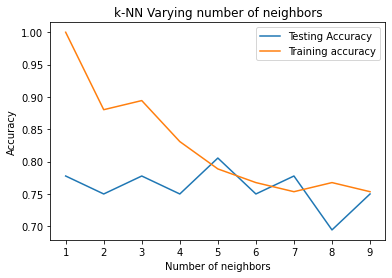

In [11]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [12]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)
#Fit the model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [13]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(x_test,y_test)

0.7777777777777778

In [14]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(x_train,y_train)

0.7535211267605634

In [15]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[13,  0,  1],
       [ 0, 12,  4],
       [ 1,  2,  3]])

In [16]:

#Confusion matrix can also be obtained using crosstab method of pandas.
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,3,All
True,,,,
1,13,0,1,14
2,0,12,4,16
3,1,2,3,6
All,14,14,8,36


In [17]:
kfold = KFold(n_splits=10)
kfold_model=KNeighborsClassifier(n_neighbors=7)
results_kfold = model_selection.cross_val_score(kfold_model,x,y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 59.64%


In [18]:
skfold = StratifiedKFold(n_splits=3)
model_skfold = KNeighborsClassifier(n_neighbors=7)
results_skfold = model_selection.cross_val_score(model_skfold,x,y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 65.74%
